# **Hello Folks! Welcome to this tutorial for Data Science with Machine Learning. This tutorial is for those who are beginners to Scikit-Learn and Machine Learning.**

# **What is Scikit-Learn?**
Scikit-Learn,often abbreviated as 'sklearn' is one of the top python libraries for Data Science. Scikit-Learn is an open source machine learning library that supports supervised and unsupervised learning.

It Provides various tools for model fitting,data-preprocessing,model-selection and evaluation.

Scikit-learn provides dozens of built in machine learning algorithms and models called as **Estimators**.


1.  It is a simple and efficient tool for data mining and data analysis.
2.  It is a Python Library built on Numpy,Scipy and Matplotlib.
3.  It is an open-source,commercially usable,BSD License library.



# **What we can achieve using Scikit-Learn library?**
The Scikit-Learn library features various Classfication,Regression,Clustering and many more algorithms.Refer the following points for more applications of the Scikit-Learn.


*   **Classification:** Identifying which category an object belongs to. One of the applications of the Classification algorithm is Spam Detection.
*   **Regression:** Predicting an attribute associated with an object. This algorithm can be used to predict the stock prices.


*   **Clustering:** This refers to automatic grouping of similar objects into sets.One of the applications is customer segmentation.
*   **Model Selection:** Comparing,Validating and choosing parameters and models.One of the applications can be improving model efficiency via parameter tuning.


*   **Dimensionality Reduction:** Reducing the number of random variables to consider.This feature can be used to increase the model efficiency.
*   **Pre-Processing:** Feature extraction and normalization.The application can be transforming input data such as text for use with machine learning alogorithms.










# **Important Machine Learning  terminologies:**
Before we move on to the tutorial,it is important to be aware of some important machine learning terms:


*   Each row is an **observation** (also known as sample,example,instance,record)
*   Each column is a **feature** (also known as predictor,attribute,independant variable)
*   The ***target*** represents what we are going to predict. (Equivalent terms for target are response,outcome,label or dependant variable)
*  There are two types of supervised learning: 
   1.  **Classification:** Classification problem is the one where the response predicted is categorical; meaning its value are in finite unordered set.
   2.   **Regression:** A regression problem is the one where the response predicted is ordered and continuous.












# **Requirements for working with a dataset in Scikit-Learn:**
1.   Features and response are separate objects.
    (Scikit-Learn expects the features and response to be passed    into machine learning modelas separate objects.)
2.   Features and response should be numeric even though it is a classification or regression problem.
1.  Features and response should be Numpy Array.
2.  Features and response are expected to have certain shapes.





# **Importing Required packages**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

***After importing the required packages,we will now move on to loading the dataset.***
In this analysis,we will use the dataset 'winequality-red.csv' ; which I got from Kaggle.

**Our Dataset consists of 1599 samples of red wine and each samples having 12 features.**

# Machine Learning on our dataset:
1.   Framed as a supervised learning problem.
2.   Predicting the quality of red wine.

(Supervised learning problem because we are trying to learn  the relationship between the data and the outcome. If the data would have been unlabelled,this would have been an unsupervised learning problem.)





In [ ]:
redwine = pd.read_csv('winequality-red.csv')

In [ ]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**The .head() function will display the top 5 rows by default. If you wish to print the first 10 rows,add 10 in the parenthesis.**

In [ ]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**The .info() function will give a concise summary of the dataframe.**

In [ ]:
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**This function will tell us the number of null values in the respective dataframe.As we can see,there are no null values in the dataframe,hence 0 is returned.**

# **Preprocessing Data**

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad' , 'good']
redwine['quality'] = pd.cut(redwine['quality'], bins =  bins,labels = group_names)

**By using the above lines of code,we are going to separate the wines into two labels of quality.The wines whose quality ranges from 2 to 6.5 would be labelled as "bad" where wines ranging from 6.5 to 8 will be labelled as "good."**

In [ ]:
label_quality = LabelEncoder() #The LabelEncoder() funtion is a part of the Scikit-Learn library.

In [ ]:
redwine['quality'] = label_quality.fit_transform(redwine['quality'])

**This fit_transform() method is basically the combination of fit method and transform method.This method performs fit and transform on the input data at a single time and converts the data points.** 

In [ ]:
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


**After running the code above,we can observe the wines have been labelled as good(1) and bad(0) in terms of quality.**

In [ ]:
redwine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

**After labelling and segregating the wines as good and bad we can see the actual number of wines which are good and bad in terms of quality.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


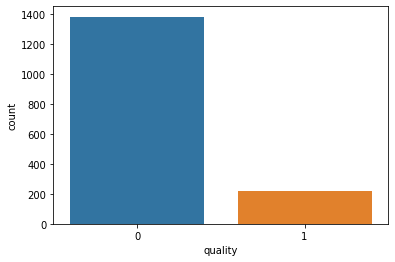

In [ ]:
sns.countplot(redwine['quality'])

**We can also depict the number of good and bad wines graphically.**

# **Separating the dataset as response variable and feature variable:**


*   Response Variable: It is a variation depends on other variables. It is the subject of change within an experiment.
*   Feature Variable: A feature variable is a measurable property of the object you’re trying to analyze. In datasets, features appear as columns.



In [ ]:
X = redwine.drop('quality' , axis = 1)
y = redwine['quality']

# **Training and Test Splitting of data**
The following steps are to be followed:

*   Splitting the data set into two pieces,a training set and a testing set.
*   Train the model on the testing set.
*   Test the model on testing set and evaluate the performance of model.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#The train_test_split() function is a part of the Scikit-Learn library.

**If we use an optional parameter called random state and give it an integer value it will split a given data set the exact same way. In our case we are assigning the value of random state as 42.**

# **Applying Standard Scaling to get optimized result**

In [ ]:
sc = StandardScaler()   #The StandardScaler() funtion is a part of the Scikit-Learn library.
                        #StandardScaler removes the mean and scales each feature/variable to unit variance.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

**From the above lines of code,we can observe that our variables are now much more uniform and they have scaled themselves to the same scale.**

# **The training and testing of data is now complete.We will use the following machine learning algorithms:**



*   K-Nearest Neighbours (KNN)
*   Random Forest Classifier
*   SVM Classifier
*   Logistic Regression
*   Naive Bayes
*   Decision Trees






**We will also form a Neural Network using the MLP Classifier**



# **Scikit-Learn 4-step modelling pattern**
(Can be reused across other models as well.)

 **STEP 1:** Import the class which we want to use.

 **STEP 2:** Instantiate the 'estimator'.
  (sklearn refers to its models as estimators)

 **Important points to remember while instantiation:**
   

1.   Name of the object does not matter.(the name should reflect the type of model it represents)
2.   Can specify tuning parameters (also known as 'hyperparameters')during this step.
1.   All the parameters which are not specified are set to default.

**STEP 3:** Fit the model with data(aka "Model-Training"). Model is learning the relationship between X and y.

**STEP 4:** Predict the response for a new observation.
*   New obseravations are called "out of sample" data.
*   Returns a Numpy array.
*   Can predict for multiple observations at once.











 



# **K-Neighbours Classifier (KNN)**
**Steps for training a machine learning model with K-Nearest Neighbours:**
**STEP 1:** Pick a value for K.

**STEP 2:** Search for the K observations in the training data that are nearest to the measurements.

**STEP 3:** Use the most popular response value from the K nearest Neighbours as predicted response value.

![knn only data.jpeg](https://drive.google.com/uc?id=1WvSmKFi1ha8q29wKhC01fZdwDC1mW9AY)

Each point represents an observation and the color of the point represents its response class.

![Develop-k-Nearest-Neighbors-in-Python-From-Scratch.png](https://drive.google.com/uc?id=1WMLpwFVcVKYnyYMPkISA2uIQZDLno24s)

**The background of the diagram has been colored red for areas for which the nearest neighbour is represented by red.**

(The background color will tell us whta will be the predicted response value for the new observation depending upon its X and y features.)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# **Let's see how well our model has performed:**

In [ ]:
print(classification_report(y_test, knn_pred)) 
print(confusion_matrix(y_test, knn_pred)) 

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.65      0.43      0.51        47

    accuracy                           0.88       320
   macro avg       0.78      0.69      0.72       320
weighted avg       0.87      0.88      0.87       320

[[262  11]
 [ 27  20]]


# **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

**After executing the above lines of code,we can observe that out of 20 wines,17 are classified as bad and 3 as good.**

# **Let's see how well our model has performed:**

In [ ]:
print(classification_report(y_test, rfc_pred)) 
print(confusion_matrix(y_test, rfc_pred)) 
#The classification_report and confusion_matrix function is a part of the Scikit-Learn Library.

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.51      0.59        47

    accuracy                           0.89       320
   macro avg       0.80      0.74      0.76       320
weighted avg       0.88      0.89      0.89       320

[[262  11]
 [ 23  24]]


**By using the confusion matrix,we can determine how well our model works and how accurate our model is. As you can observe from the confusion matrix,the model can determine that 264 wines are of bad quality correctly. Whereas 7 of the bad quality wines were mislabelled. The same applies to good quality wines.**

**Confusion Matrix is a table that describes the performance of a classification model.**

# **SVM Classifier**
**(Support Vector Model)**

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# **Let's see how well our model has performed:**

In [ ]:
print(classification_report(y_test, svm_pred)) 
print(confusion_matrix(y_test, svm_pred)) 


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


**The SVM Classifier tends to work better with smaller numbers**

# **Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# **Let's see how well our model has performed:**

In [ ]:
print(classification_report(y_test, lr_pred)) 
print(confusion_matrix(y_test, lr_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320

[[264   9]
 [ 34  13]]


# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# **Let's see how well our model has performed:**

In [ ]:
print(classification_report(y_test, nb_pred)) 
print(confusion_matrix(y_test, nb_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.49      0.79      0.60        47

    accuracy                           0.85       320
   macro avg       0.72      0.82      0.75       320
weighted avg       0.89      0.85      0.86       320

[[234  39]
 [ 10  37]]


# **Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# **Let's see how well our model has performed:**

In [ ]:
print(classification_report(y_test, dt_pred)) 
print(confusion_matrix(y_test, dt_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.65      0.60      0.62        47

    accuracy                           0.89       320
   macro avg       0.79      0.77      0.78       320
weighted avg       0.89      0.89      0.89       320

[[258  15]
 [ 19  28]]


# **Neural Networks**

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
mlpc_pred = mlpc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **Let's see how well our model has performed:**

In [ ]:
print(classification_report(y_test, mlpc_pred)) 
print(confusion_matrix(y_test, mlpc_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       273
           1       0.61      0.57      0.59        47

    accuracy                           0.88       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.88      0.88      0.88       320

[[256  17]
 [ 20  27]]


# **CROSS VALIDATION**
*Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.*

The main essence of cross validation is that we can implement this by creating a bunch of different train-test-splits; calculating the testing accuracy each time and then averaging the results together in order to reduce the variance.

**The most common method is K-Fold Cross Validation.**
(Not to be confused with 'K' of K-Neighbors Classifier.)

# **STEPS for K-Fold Cross Validation**


1.   **Split the dataset into K-equal partitions or "folds".**
    
    (Choose a number K ; and split the whole dataset into K-partitions of equal size)
2.   **Use fold 1 as the testing set and the union of the other folds as the training set.**
    
    (Designating fold 1 as testing set)
1.   **Calculate testing accuracy.**

    (Train model on the training set and we make predictions on testing set and calculate the testing accuracy.)
2.   **Repeat steps 1 and 2 K times,using a different fold as the testing set each time.**

   (During the second iteration,the 2nd fold/partition will be recognised as as training set and others as testing set.)
1.   **Use the average testing accuracy as the estimate of out-of-sample accuracy.**

   (Finally,the average testing accuracy also known as cross validated accuracy,is used as out of sample accuracy.)








![5-Fold-Cross-Validation.jpg](https://drive.google.com/uc?id=10eIhcTeYhgHGG8qRw1P1E6wYAZ5HngdF)

# **Comparing Cross-Validation to train-test-split**
**Advantages of Cross-Validation:**


*   Cross-Validation generates a more accurate estimate of out-of-sample accuracy which we need todo in order to choose best model.
*   There is more efficient use of data since every observation is used for training and testing.

**Advantages of train-test-split**


*   Runs K-Times faster than K-Fold Cross-Validation(it repeats the train-test-split process K times)
*  More easier to examine detailed results of testing process from train-test-split.





# **Cross Validation Example: Parameter Tuning**
 Goal: The goal in this case is to select the best tuning parameters also known as hyper parameters for KNN classification model.

 We want to select the tuning parameters for KNN,which will produce a model that best generalizes to out of sample data.

In [ ]:
from sklearn.model_selection import cross_val_score 

In [ ]:
#10 fold cross validation as an estimate of out-of-sample accuracy
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.875      0.85625    0.825      0.8        0.86875    0.8625
 0.78125    0.83125    0.8875     0.86792453]


In [ ]:
#use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.8455424528301887


In [ ]:
#search for an optimal value of K for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())
print(k_scores)


[0.8261320754716982, 0.8567845911949685, 0.8449095911949686, 0.8549213836477989, 0.8455424528301887, 0.8549135220125785, 0.8480345911949685, 0.8505424528301886, 0.8517924528301887, 0.8511674528301887, 0.8542924528301887, 0.8624174528301888, 0.8599135220125786, 0.8605385220125786, 0.8599135220125786, 0.8642924528301886, 0.8611674528301887, 0.8599174528301887, 0.8599174528301885, 0.8617924528301886, 0.8592924528301887, 0.8624174528301888, 0.8611674528301887, 0.8630424528301888, 0.8617924528301886, 0.8617924528301886, 0.8611674528301887, 0.8611674528301887, 0.8624174528301886, 0.8630424528301888]


Text(0, 0.5, 'Cross Validated Accuracy')

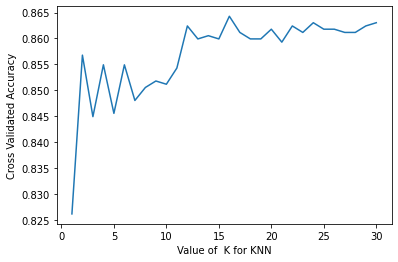

In [ ]:
#plotting the value of K for KNN(x-axis) vs the cross validated accuracy(y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of  K for KNN')
plt.ylabel('Cross Validated Accuracy')

# **Determine the accuracy of our best model,which is RFC:**

In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, rfc_pred)
cm

0.89375

In [ ]:
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


# **That's it from my side folks! I hope that you understood the purpose of Scikit Learn and the basic functions required to perform Data Analysis on a dataset.**